# PyGeoAPI

Here we are going it explore setting up and using [PyGeoAPI](https://pygeoapi.io/) and the [OGC EDR API](https://github.com/opengeospatial/ogcapi-environmental-data-retrieval) to request timeseries data.

We're going to use a Wave Watch 3 forecast for the East Coast, and request data for Buoy E01 (Lat: 43.72 Lon: -69.35).

We'll start with a quick look a the dataset (and grabbing some info from it that we need to setup the PyGeoAPI config).

In [1]:
import xarray as xr
import requests

This dataset is avaliable from https://gmri-research-data.nyc3.digitaloceanspaces.com/IOOS-code-sprint/ww3_72_east_coast_2022041112.nc

In [2]:
ds = xr.open_dataset("../datasets/ww3_72_east_coast_2022041112.nc")
ds

<xarray.Dataset>
Dimensions:                  (longitude: 381, latitude: 351, time: 73,
                              forecast_reference_time: 1)
Coordinates:
  * longitude                (longitude) float32 -93.0 -92.9 ... -55.1 -55.0
  * latitude                 (latitude) float32 20.0 20.1 20.2 ... 54.9 55.0
  * time                     (time) datetime64[ns] 2022-04-11T12:00:00 ... 20...
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 2022-04...
Data variables: (12/21)
    hs                       (forecast_reference_time, time, latitude, longitude) float32 ...
    t02                      (forecast_reference_time, time, latitude, longitude) float32 ...
    t0m1                     (forecast_reference_time, time, latitude, longitude) float32 ...
    t01                      (forecast_reference_time, time, latitude, longitude) float32 ...
    fp                       (forecast_reference_time, time, latitude, longitude) float32 ...
    dir                      (forecast_reference_time, time, latitude, longitude) float32 ...
    ...                       ...
    pdir2                    (forecast_reference_time, time, latitude, longitude) float32 ...
    pws0                     (forecast_reference_time, time, latitude, longitude) float32 ...
    pws1                     (forecast_reference_time, time, latitude, longitude) float32 ...
    pws2                     (forecast_reference_time, time, latitude, longitude) float32 ...
    tws                      (forecast_reference_time, time, latitude, longitude) float32 ...
    pnr                      (forecast_reference_time, time, latitude, longitude) float32 ...
Attributes: (12/16)
    WAVEWATCH_III_version_number:     5.16
    WAVEWATCH_III_switches:           F90 SHRD NOGRB NOPA LRB4 NC4 TRKNC PR3 ...
    SIN4 namelist parameter BETAMAX:  1.65
    product_name:                     ww3.20220411.nc
    area:                             NW Atlantic  6 arc min grd2
    latitude_resolution:              0.1000000
    ...                               ...
    easternmost_longitude:            -55.00000
    minimum_altitude:                 -12000 m
    maximum_altitude:                 9000 m
    altitude_resolution:              n/a
    start_date:                       2022-04-11 12:00:00
    stop_date:                        2022-04-11 23:00:00

PyGeoAPI needs the bounds of the dataset. I've already got most of the config needed for the dataset, it just needs updated temporal extents.

In [3]:
ds['time'].min(), ds['time'].max()

(<xarray.DataArray 'time' ()>
 array('2022-04-11T12:00:00.000000000', dtype='datetime64[ns]'),
 <xarray.DataArray 'time' ()>
 array('2022-04-14T12:00:00.000000000', dtype='datetime64[ns]'))

## PyGeoAPI configuration

PyGeoAPI uses a YAML config file. Individual datasets are setup as resources, and different providers within a resource are responsible for API types.

There is a lot of general configuration it does not like you to skip.

In [6]:
!cat ./config.yaml

server:
  bind:
    host: 0.0.0.0
    port: 5002
  cors: true
  language: en-US
  manager:
    connection: /tmp/pygeoapi-process-manager.db
    name: TinyDB
    output_dir: /tmp/
  map:
    attribution:
      <a href="https://wikimediafoundation.org/wiki/Maps_Terms_of_Use">Wikimedia
      maps</a> | Map data &copy; <a href="https://openstreetmap.org/copyright">OpenStreetMap
      contributors</a>
    url: https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png
  url: http://localhost:5002
logging:
  level: DEBUG
metadata:
  contact:
    address: 195 New Hampshire Ave, Suite 240
    city: Portsmouth
    country: United States
    email: tom@neracoos.org
    name: Shyka, Tom
    phone: +01-603-319-1785
    position: Product & Engagement Manager
    postalcode: 03801
    role: pointOfContact
    stateorprovince: New Hampshire
    url: http://neracoos.org
  identification:
    description: OGC APIs for NERACOOS services
    keywords:
      - geospatial
      - data
      - api
      - oceanogr

## Running PyGeoAPI

From this directory run `PYGEOAPI_CONFIG=./config.yaml pygeoapi serve`.

Then you should be able to access PyGeoAPI at http://localhost:5002/

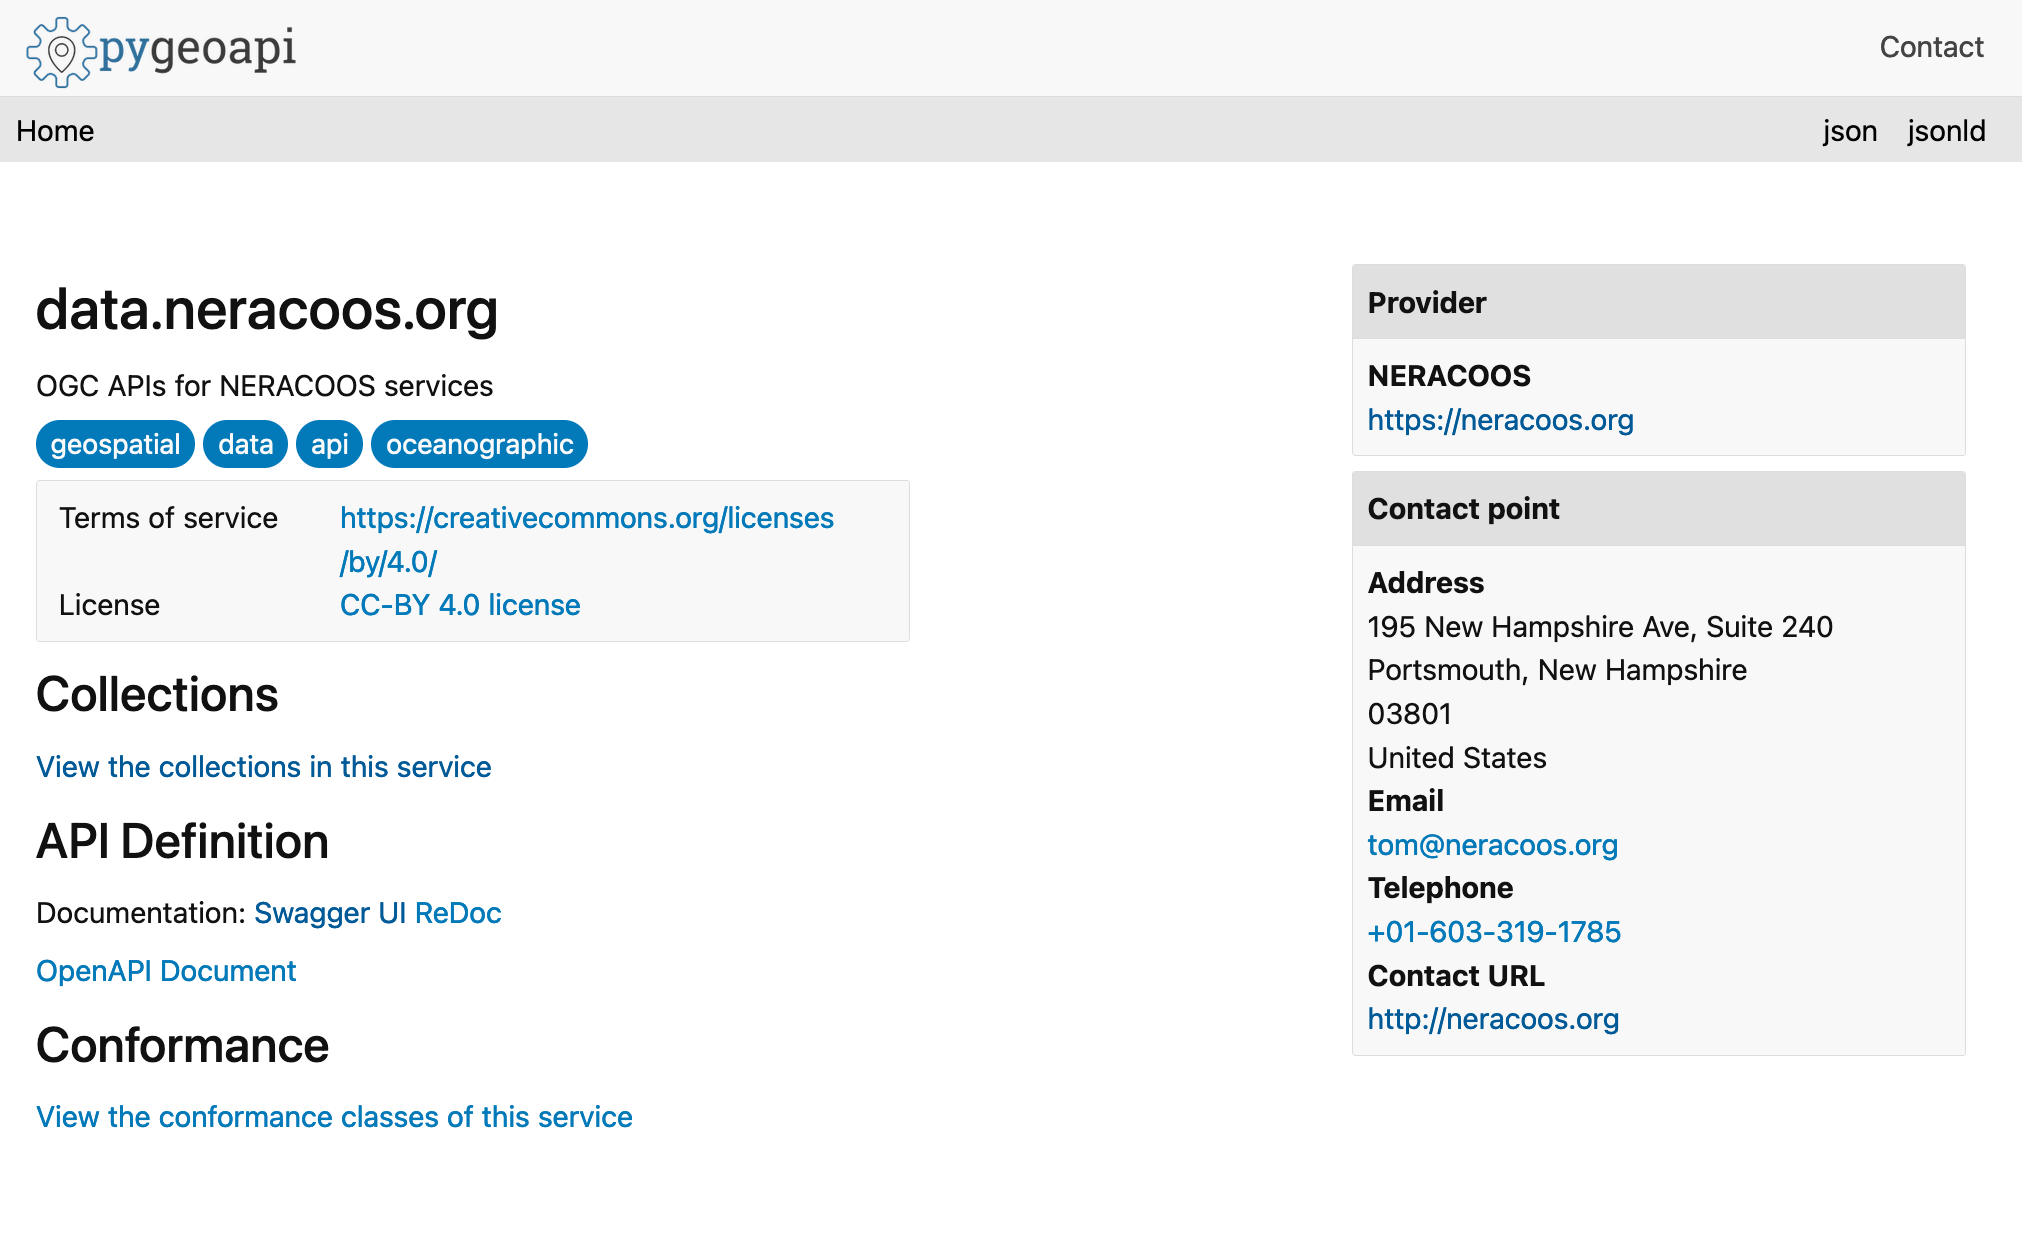

From there you can explore into collections, then check out the collection that we defined.

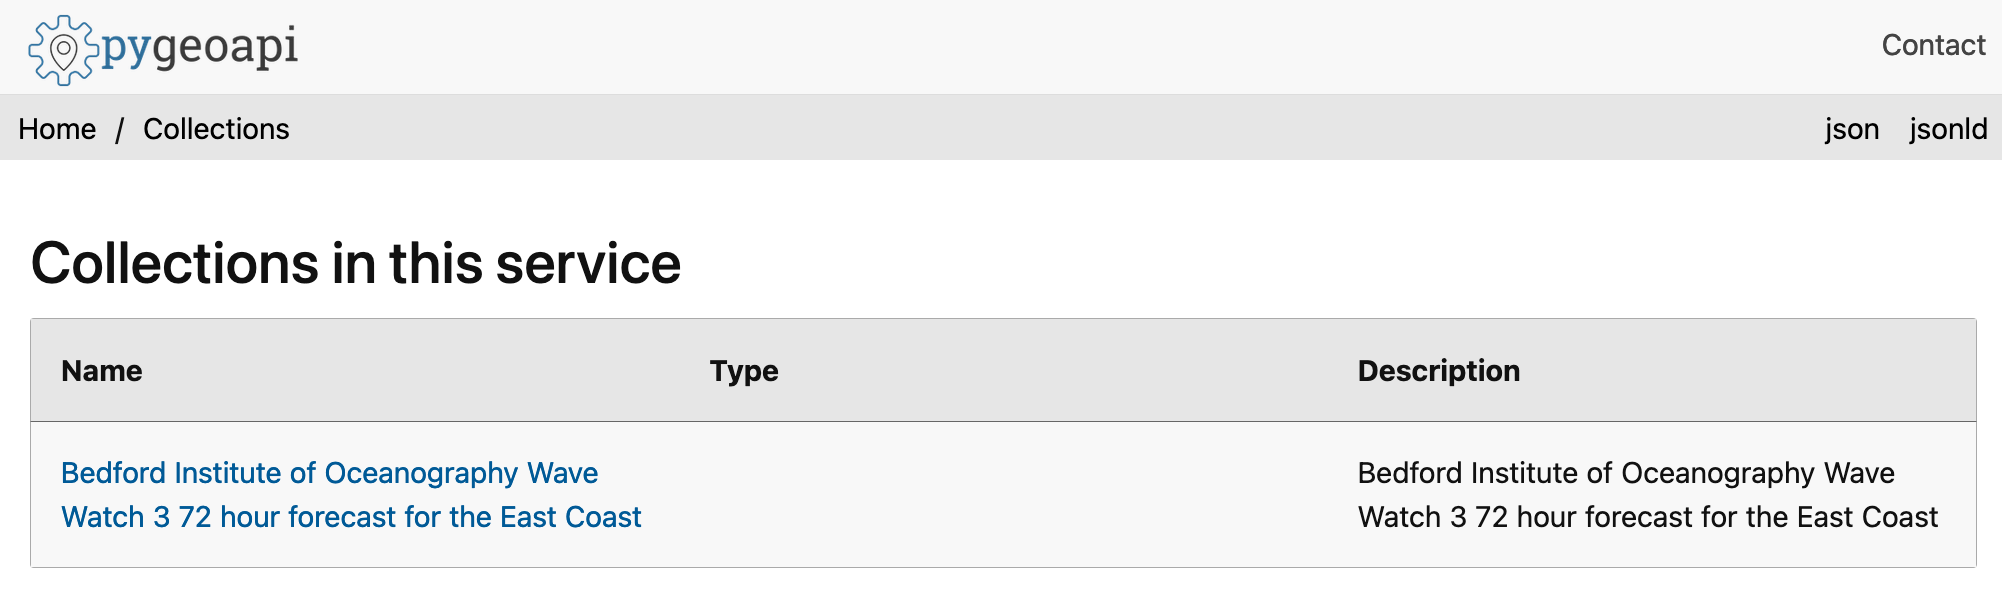